In [88]:
#IPYNB For Optimizing KNN
#many of these libraries are probably not needed
import pandas as pd 
import numpy as np
import os
from skimage.feature import hog
import matplotlib.pyplot as plt
from KNN import knn_predict_L2, knn_predict_L1
from plotutils import plot_data, plot_surface
from knncrossval import KNN_cross_validate
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from confusion_matrix import make_confusion_matrix
from skimage.feature import hog
import numpy as np
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
#cwd = os.getcwd() #if need the current directory 
df = pd.read_csv('digit-recognition/digit-recognition/train.csv')
df2 = pd.read_csv('digit-recognition/digit-recognition/test.csv')
#the shape of the dataframe is (38000, 785) meaning there are 38000 samples and 1 label with 784 features

(38000,)
(38000, 784)
Training subset selection: 1


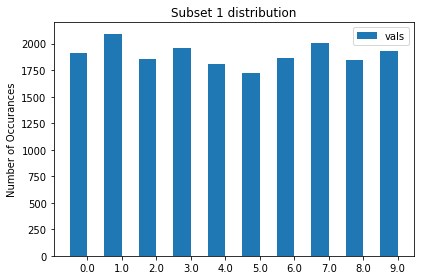

(19000, 784)
(4000, 28, 28, 1)


In [90]:
#turn the training dataframe into numpy array 
label_data_train = df.to_numpy()

#column vector for the labels (38000,)
label_train = label_data_train[:,0] 

#( 38000 x 784 matrix for the training data  )
data_train = label_data_train[:, 1:] 
print(label_train.shape)
print(data_train.shape)

#turn testing dataframe into numpy array 
label_data_test = df2.to_numpy()
label_test = label_data_test[:,0]
data_test = label_data_test[:,1:]
num_train_splits = 2 #int(num_cv_splits/2)
num_labels = len(np.unique(label_train))
# We won't train on the whole data set either but will get a data subset larger than the CV subset. 
# Pick our subset by choosing the split with the most equal label distribution.
frequencies = np.zeros((num_train_splits, num_labels, 2))
split_train_labels = np.split(label_train, num_train_splits)

for i in range(len(split_train_labels)):
    (unique, counts) = np.unique(split_train_labels[i], return_counts=True)
    frequencies[i] = np.asarray((unique, counts)).T
    
variances = np.zeros(len(frequencies))

for i in range(len(frequencies)):
    labels = frequencies[i][:, 0]
    vals = frequencies[i][:, 1]
    variances[i] = np.var(vals)
    
training_subset_selection = np.argmin(variances)
print("Training subset selection: {0}".format(training_subset_selection))

labels = frequencies[training_subset_selection][:, 0]
vals = frequencies[training_subset_selection][:, 1]

x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.25, vals, 0.5, label='vals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Occurances')
ax.set_title('Subset {0} distribution'.format(training_subset_selection))
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

split_train_data = np.split(data_train, num_train_splits)[training_subset_selection]
split_train_labels = np.split(label_train, num_train_splits)[training_subset_selection]
#rint(np.array(split_train_data).shape)
print(split_train_data.shape)
split_train_data = split_train_data.reshape(split_train_data.shape[0],28,28,1)
data_test = data_test.reshape(data_test.shape[0],28,28,1)
print(data_test.shape)

In [99]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
print
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation='relu',
                                 input_shape=(28,28,1)))
#model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.25))
#model.add(MaxPooling1D((2)))
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
#model.add(Dropout(0.25))
#model.add(MaxPooling1D((2)))
model.add(Flatten())
#often use multiple dense layers 
#model.add(Dense(64, activation='softmax'))
#model.add(Dense(128, activation='relu')) #needs to be equal to # of filters
model.add(Dense(10, activation='softmax'))
model.summary()
#'categorical_crossentropy'
#sgd
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.01),
              metrics=['accuracy'])


model.fit(split_train_data, split_train_labels,
          batch_size=128,
          epochs=5,
          validation_data=(data_test,label_test))

test_loss, test_acc = model.evaluate(data_test, label_test)
#for the error I am getting, it has to do with the full shape being [4,784]

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
149/149 [==============================] - 5s 32ms/step - loss: 8.2222 - accuracy: 0.8585 - val_loss: 0.2123 - val_accuracy: 0.9350
Epoch 2/5
149/149 [==============================] - 5s 31ms/step - loss: 0.1845 - accuracy: 0.9426 - val